# What are the job prospects for becoming a Data Analyst?
    
    #Which companies and locations have the best salary expections? ratings?
    #Correlation between Job Title and salary offered by the company?
    #Correlation between the size of the company and the salary?
    #Correlation between the ratings and salary?
    

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress

In [88]:
# Load in file
file1 = "..\DataAnalystJobProspects\DataAnalyst.csv"

# Explore DataSet

In [89]:
#Read and display the CSV with Pandas
old_data = pd.read_csv(file1)
old_data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


# Clean DataSet

In [106]:
#Remove Unnamed Column
data = old_data.drop(columns=['Unnamed: 0', 'Job Description', 'Headquarters', 'Founded', 'Competitors', 'Revenue', "Easy Apply"])
data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [107]:
#Remove missing values. Replace all missing values in dataset
#data.dropna(inplace = True) only returns 28 values
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)
data.head(5)


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"


In [108]:
try_this = data['Job Title'].str.split(',', n=1)
data['Job Title'],data['Department'] = try_this.str[0], try_this.str[1]

data.drop(columns = ["Department"], inplace = True)
data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [109]:
try_it = data['Company Name'].str.split('\n', n=1)
data['Company Name'],data['R2'] = try_it.str[0], try_it.str[1]
                                                            
data.drop(columns = ["R2"], inplace = True)
data.head(2)


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [112]:
by_salary = data['Salary Estimate'].str.split('(', n=1)
data['Salary Estimate'],data['Glass'] = by_salary.str[0], by_salary.str[1]

data.drop(columns = ["Glass"], inplace = True)

data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [113]:
split_salary = data['Salary Estimate'].str.split('-', n=1)
data['Minimum Salary'],data['Maximum Salary'] = by_salary.str[0], by_salary.str[1]

#data.drop(columns = ["Glass"], inplace = True)

data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,$37K-$66K,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$37K-$66K,NaN
1,Quality Data Analyst,$37K-$66K,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$37K-$66K,NaN


In [116]:
# new data frame with split value columns 
new = data["Salary Estimate"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["Minimum Salary"]= new[0] 
  
# making separate last name column from new data frame 
data["Maximum Salary"]= new[1] 

data.drop(columns = ["Salary Estimate"], inplace = True) 

data.head(2)

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$37K,$66K
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$37K,$66K


# Companies with ratings of 3 or more

In [179]:
data_filtered = data[data['Rating']>= 3]
data_filtered.head()

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$37K,$66K
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$37K,$66K
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,$37K,$66K
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$37K,$66K
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$37K,$66K


# Data Visualization

In [180]:
#job_count = data_filtered["Job Title"].value_counts()
#job_count.head(30)

data_filtered = data_filtered.replace({
    
    "Sr. Data Analyst ": "Senior Data Analyst", 
    "Sr Data Analyst": "Senior Data Analyst",
    "Master Data Analyst" : "Senior Data Analyst",
    'Sr Analyst': "Senior Data Analyst",
    "Sr. Analyst" : "Senior Data Analyst",
    "Senior Analyst" : "Senior Data Analyst",
    "Data Analyst Junior" : "Junior Data Analyst",
    "Data Analyst I" : "Junior Data Analyst",
    "Data Analyst 3" : 'Senior Data Analyst' ,
    "Data Analyst III" : "Senior Data Analyst"
    })
job_count = data_filtered["Job Title"].value_counts()
job_count.max().nlargest(30)


AttributeError: 'int' object has no attribute 'nlargest'

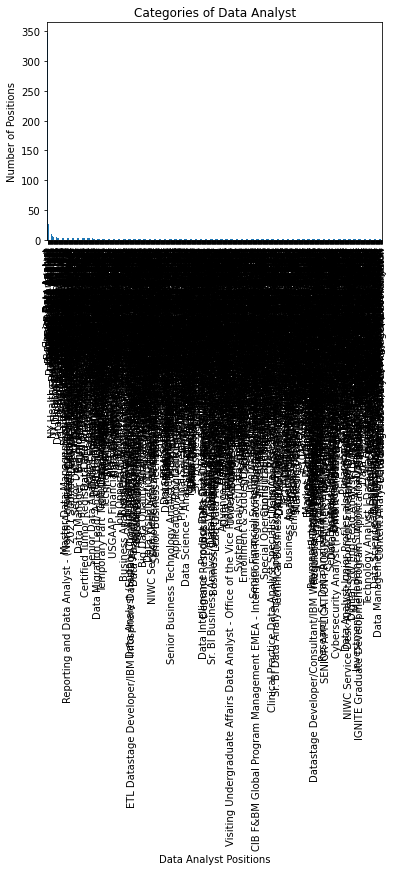

<Figure size 432x288 with 0 Axes>

In [181]:
postions = job_count.plot(kind='bar')
positions = data_filtered[data_filtered.MonthName == "Job Title"]
month_jan[feature_cols].sum().sort_values(ascending=0).plot(kind='bar')

# Set the xlabel and ylabel using class methods

plt.title("Categories of Data Analyst")
plt.xlabel("Data Analyst Positions")
plt.ylabel("Number of Positions")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Positions')

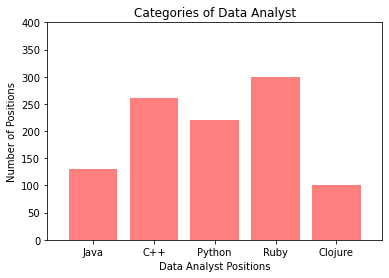

In [168]:
users = [130, 260, 220, 300, 100]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Categories of Data Analyst")
plt.xlabel("Data Analyst Positions")
plt.ylabel("Number of Positions")

In [10]:
title = graph
jobs = job_count

x_axis = np.arange(0, len(jobs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Types of Data Analyst Jobs")
plt.xlabel("Types of Jobs")
plt.ylabel("Number of Positions")

plt.xlim(-0.75, len(jobs)-.25)
plt.ylim(0, max(title) + 5)

plt.bar(x_axis, jobs, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, title, rotation= 90)
plt.show()


NameError: name 'graph' is not defined

# Word Cloud: Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

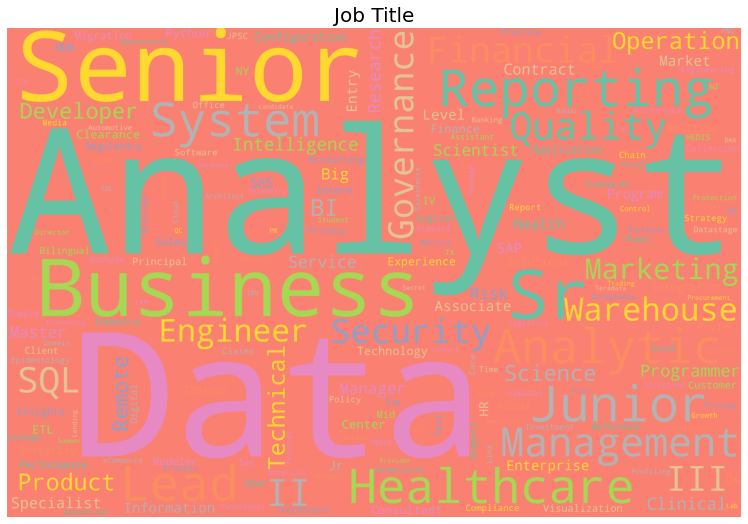

In [11]:
frequent_words=data['Job Title']

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(' '.join(frequent_words))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordcloud)
plt.show()